In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import os
import pickle
from tqdm import tqdm as tqdm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#y = np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/label.npy')
#X_train =  np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/X_train.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/label2.npy')
X_train =  np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/X_train2.npy')

y_test = np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/label_test.npy')
X_test =  np.load('/content/drive/MyDrive/Colab Notebooks/INL/processed_data/X_test.npy')

In [ ]:
y.shape

(11730,)

In [ ]:
y_test.shape

(2237,)

In [ ]:
num2label_dict = {0: 'state__idle',
           1: 'state__shoulder__flexion',
           2: 'state__elbow__extension',
           3: 'state__wrist__pronation',
           4: 'state__wrist__supination',
           5: 'state__hand__open',
           6: 'state__hand__close',
           7: 'state__elbow__flexion', #ignore label 7 as it produces weird results
          }

In [ ]:
label2num_dict = {'state__idle': 0,
           'state__shoulder__flexion': 1,
           'state__elbow__extension': 2,
           'state__wrist__pronation': 3,
           'state__wrist__supination': 4,
           'state__hand__open': 5,
           'state__hand__close': 6,
           'state__elbow__flexion': 7, #ignore label 7 as it produces weird results
          }

In [ ]:
from collections import Counter
train_count = Counter(y)
test_count = Counter(y_test)

In [ ]:
train_count.items()

dict_items([(0.0, 7321), (5.0, 861), (6.0, 522), (3.0, 613), (4.0, 56), (2.0, 1628), (1.0, 650), (7.0, 79)])

In [ ]:
train_count = Counter({num2label_dict.get(key, key): count for key, count in  train_count.items()})
test_count = Counter({num2label_dict.get(key, key): count for key, count in  test_count.items()})

In [ ]:
train_count

Counter({'state__idle': 7321,
         'state__hand__open': 861,
         'state__hand__close': 522,
         'state__wrist__pronation': 613,
         'state__wrist__supination': 56,
         'state__elbow__extension': 1628,
         'state__shoulder__flexion': 650,
         'state__elbow__flexion': 79})

In [ ]:
test_count

Counter({'state__idle': 1416,
         'state__elbow__extension': 193,
         'state__wrist__pronation': 139,
         'state__wrist__supination': 1,
         'state__hand__open': 223,
         'state__hand__close': 193,
         'state__shoulder__flexion': 54,
         'state__elbow__flexion': 18})

In [ ]:
from collections import OrderedDict
train_count = OrderedDict([(label, train_count.get(label, 0)) for label in label2num_dict])
test_count = OrderedDict([(label, test_count.get(label, 0)) for label in label2num_dict])

In [ ]:
train_count

OrderedDict([('state__idle', 7321),
             ('state__shoulder__flexion', 650),
             ('state__elbow__extension', 1628),
             ('state__wrist__pronation', 613),
             ('state__wrist__supination', 56),
             ('state__hand__open', 861),
             ('state__hand__close', 522),
             ('state__elbow__flexion', 79)])

In [ ]:
test_count

OrderedDict([('state__idle', 1416),
             ('state__shoulder__flexion', 54),
             ('state__elbow__extension', 193),
             ('state__wrist__pronation', 139),
             ('state__wrist__supination', 1),
             ('state__hand__open', 223),
             ('state__hand__close', 193),
             ('state__elbow__flexion', 18)])

In [ ]:
train_count.values()

odict_values([7321, 650, 1628, 613, 56, 861, 522, 79])

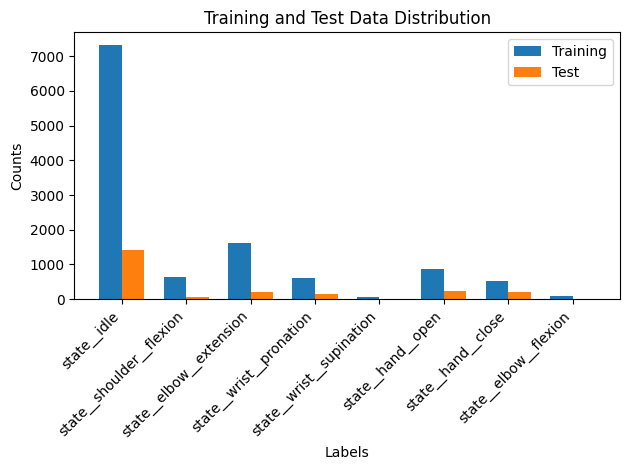

In [ ]:
import matplotlib.pyplot as plt

elements = list(train_count.keys())
train_counts = list(train_count.values())
test_counts = list(test_count.values())

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(elements))

# Create the bar plot
plt.bar(index, train_counts, bar_width, label='Training')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')

# Replace integer labels on the x-axis with dictionary values
plt.xticks(index + bar_width / 2, elements, rotation=45, ha='right')

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Training and Test Data Distribution')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()